In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


In [28]:
df=pd.read_csv("/content/sample_data/blinkit_data.csv")

In [29]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [9]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
df.isnull().sum()


,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [18]:
df.columns


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [20]:
df.describe(include="object")


,Item Fat Content,Item Identifier,Item Type,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type
count,8523,8523,8523,8523,8523,8523,8523
unique,2,1559,16,10,3,3,4
top,Low Fat,FDW13,Fruits and Vegetables,OUT027,Tier 3,Medium,Supermarket Type1
freq,5517,10,1232,935,3350,3631,5577


MISSING VALUES CHECK

In [21]:
df.isnull().sum().sort_values(ascending=False)


,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


In [22]:
(df.isnull().mean() * 100).sort_values(ascending=False)


,0
Item Fat Content,0.0
Item Identifier,0.0
Item Type,0.0
Outlet Establishment Year,0.0
Outlet Identifier,0.0
Outlet Location Type,0.0
Outlet Size,0.0
Outlet Type,0.0
Item Visibility,0.0
Item Weight,0.0


DUPLICATE CHECK

In [23]:
df.duplicated().sum()


np.int64(0)

In [24]:
df = df.drop_duplicates()


univariate

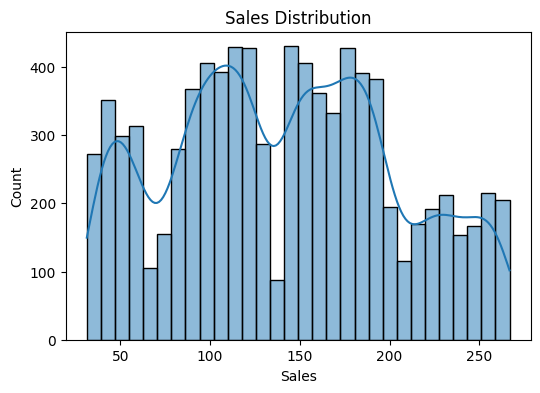

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(df['Sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()


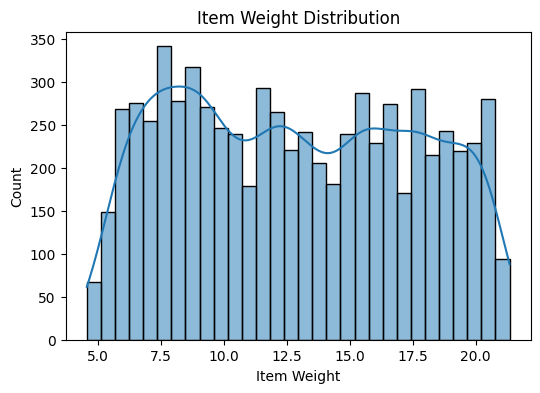

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(df['Item Weight'], bins=30, kde=True)
plt.title("Item Weight Distribution")
plt.show()


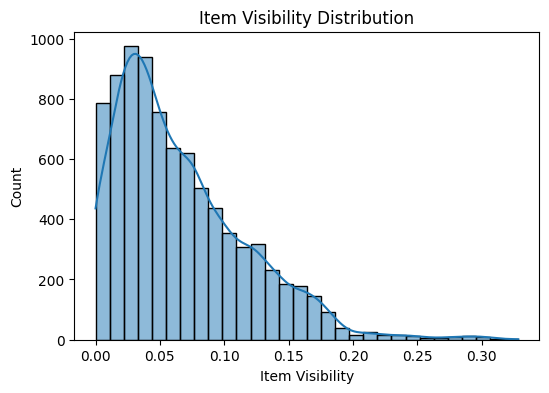

In [33]:
plt.figure(figsize=(6,4))
sns.histplot(df['Item Visibility'], bins=30, kde=True)
plt.title("Item Visibility Distribution")
plt.show()


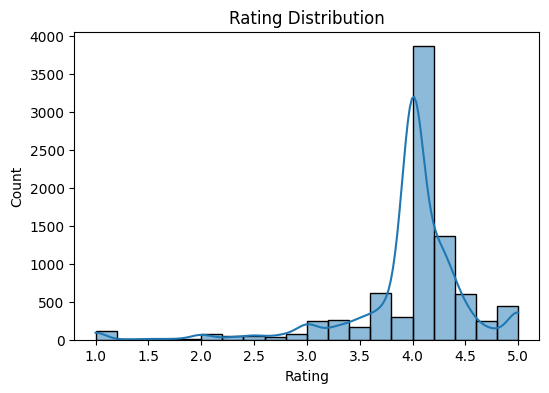

In [34]:
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()


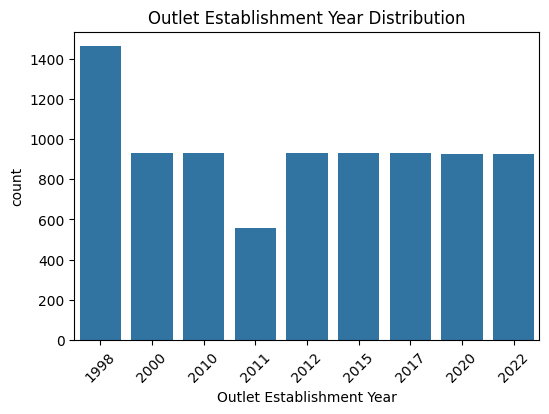

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet Establishment Year', data=df)
plt.title("Outlet Establishment Year Distribution")
plt.xticks(rotation=45)
plt.show()


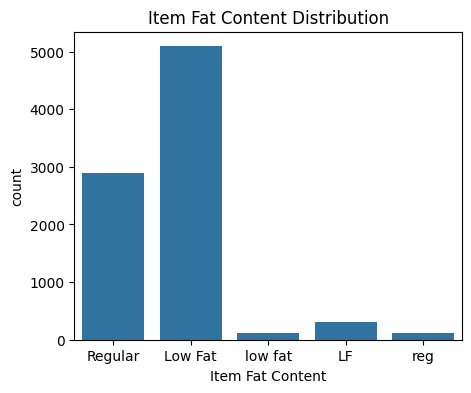

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(x='Item Fat Content', data=df)
plt.title("Item Fat Content Distribution")
plt.show()


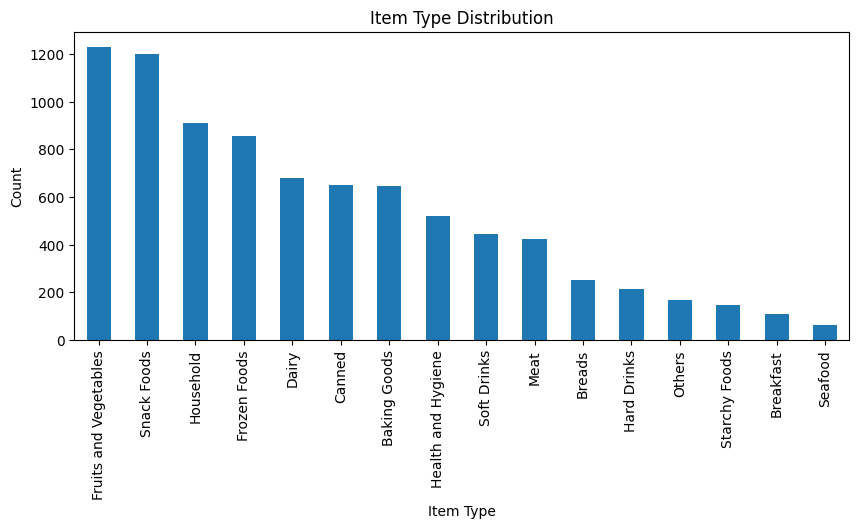

In [37]:
plt.figure(figsize=(10,4))
df['Item Type'].value_counts().plot(kind='bar')
plt.title("Item Type Distribution")
plt.ylabel("Count")
plt.show()


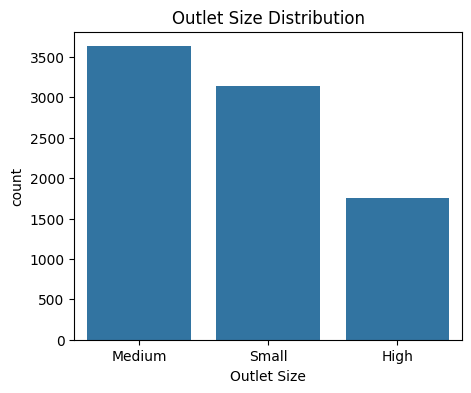

In [38]:
plt.figure(figsize=(5,4))
sns.countplot(x='Outlet Size', data=df)
plt.title("Outlet Size Distribution")
plt.show()


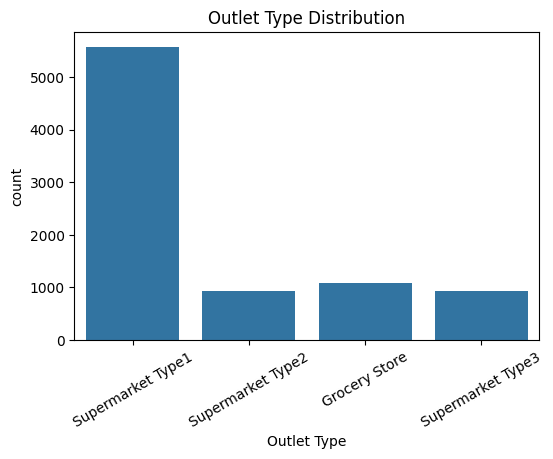

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outlet Type', data=df)
plt.title("Outlet Type Distribution")
plt.xticks(rotation=30)
plt.show()


bivariate


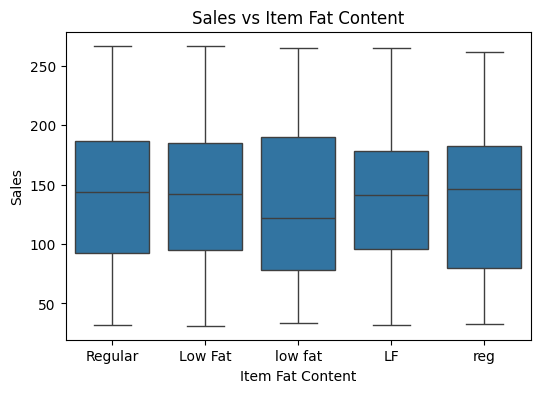

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Item Fat Content', y='Sales', data=df)
plt.title("Sales vs Item Fat Content")
plt.show()


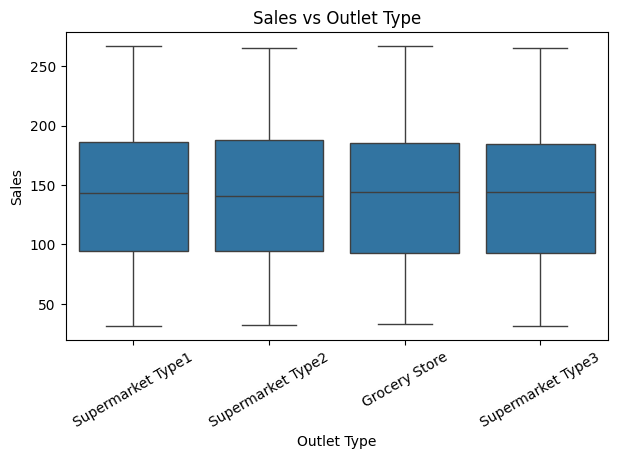

In [42]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Outlet Type', y='Sales', data=df)
plt.xticks(rotation=30)
plt.title("Sales vs Outlet Type")
plt.show()


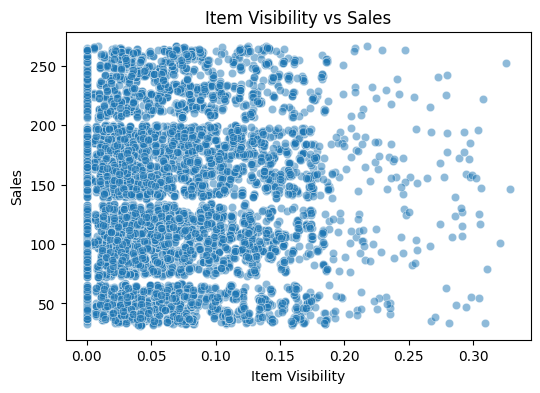

In [43]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Item Visibility', y='Sales', data=df, alpha=0.5)
plt.title("Item Visibility vs Sales")
plt.show()


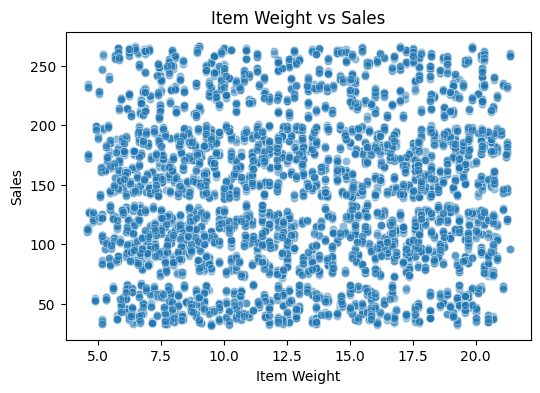

In [44]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Item Weight', y='Sales', data=df, alpha=0.5)
plt.title("Item Weight vs Sales")
plt.show()


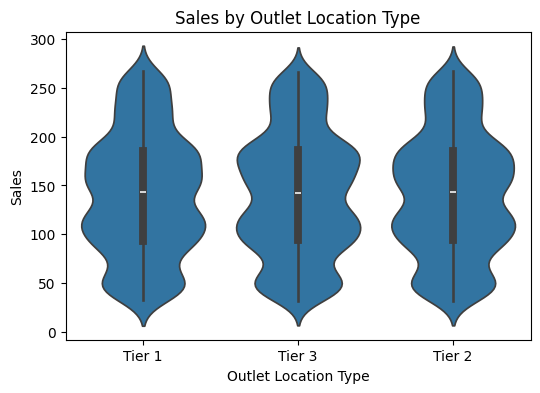

In [45]:
plt.figure(figsize=(6,4))
sns.violinplot(x='Outlet Location Type', y='Sales', data=df)
plt.title("Sales by Outlet Location Type")
plt.show()


multivariate dataset


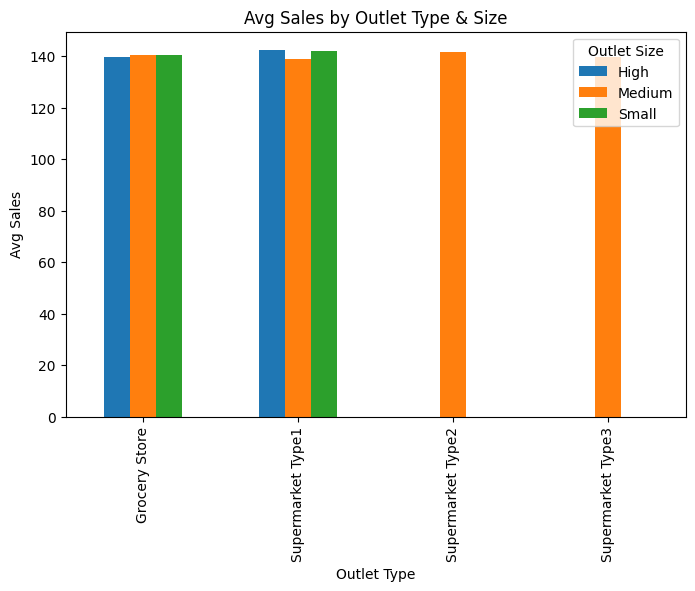

In [46]:
pivot1 = df.pivot_table(
    values='Sales',
    index='Outlet Type',
    columns='Outlet Size',
    aggfunc='mean'
)

pivot1.plot(kind='bar', figsize=(8,5))
plt.title("Avg Sales by Outlet Type & Size")
plt.ylabel("Avg Sales")
plt.show()


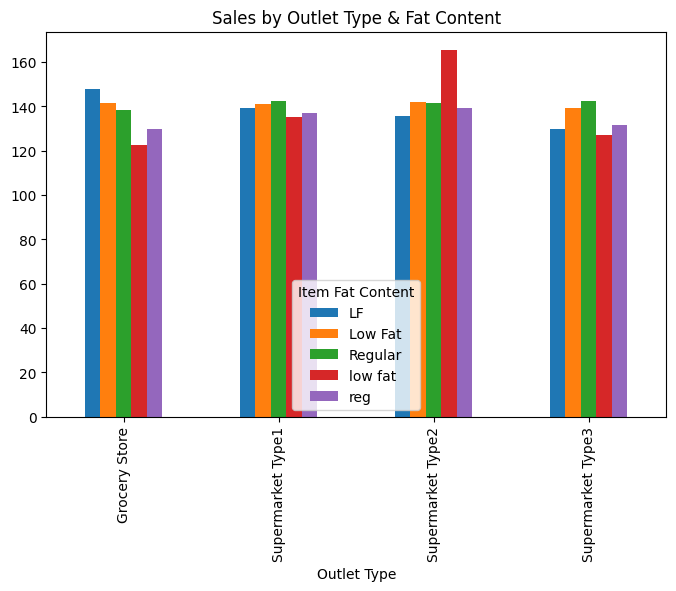

In [47]:
pivot2 = df.pivot_table(
    values='Sales',
    index='Outlet Type',
    columns='Item Fat Content',
    aggfunc='mean'
)

pivot2.plot(kind='bar', figsize=(8,5))
plt.title("Sales by Outlet Type & Fat Content")
plt.show()


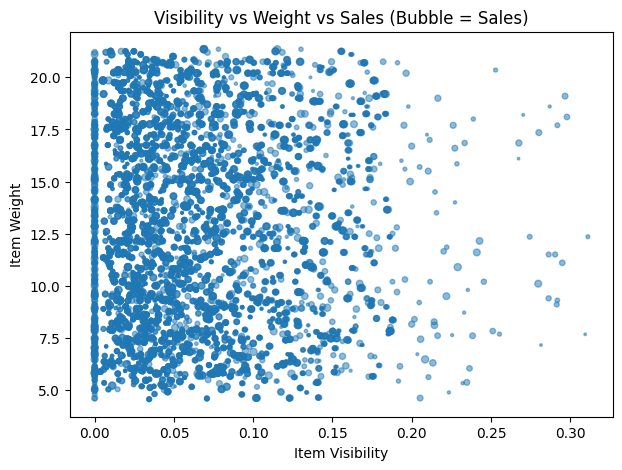

In [48]:
plt.figure(figsize=(7,5))
plt.scatter(
    df['Item Visibility'],
    df['Item Weight'],
    s=df['Sales']/10,
    alpha=0.5
)
plt.xlabel("Item Visibility")
plt.ylabel("Item Weight")
plt.title("Visibility vs Weight vs Sales (Bubble = Sales)")
plt.show()


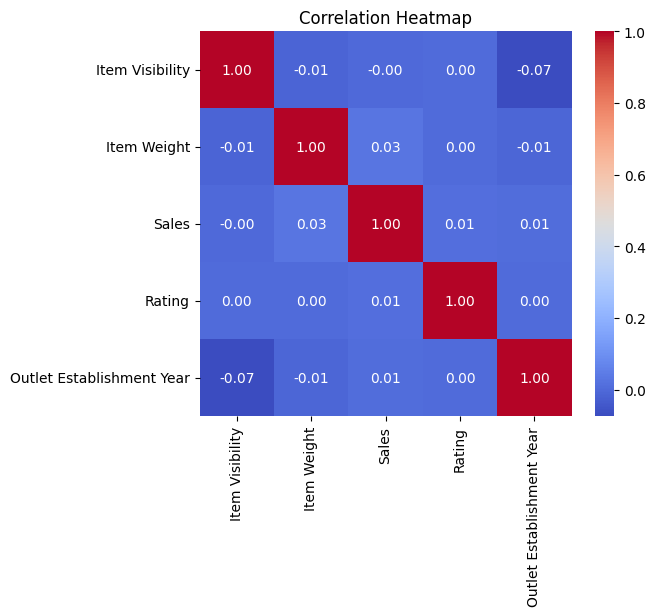

In [49]:
num_cols = [
    'Item Visibility',
    'Item Weight',
    'Sales',
    'Rating',
    'Outlet Establishment Year'
]

corr = df[num_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


Business Insights

Sales are highly skewed → few items generate most revenue

Outlet Type & Size strongly impact sales

Item Visibility alone does NOT guarantee higher sales

Low Fat vs Regular shows meaningful sales differences

Tier-2/Tier-3 locations show higher variability in sales

🔹 Strategic Recommendations

Focus inventory on high-performing item types

Optimize product placement, not just visibility

Invest more in large & medium outlets

Re-evaluate low-selling categories across all outlets

# 📊 Blinkit Sales Data – End-to-End Exploratory Data Analysis (EDA)

## 📌 Project Overview
This project performs a **complete Exploratory Data Analysis (EDA)** on a Blinkit (BigMart-style) retail dataset to understand **sales drivers, outlet performance, product characteristics, and customer demand patterns**.

The analysis follows a **structured data analytics workflow**:
- Data understanding
- Univariate analysis
- Bivariate analysis
- Multivariate analysis
- Correlation analysis
- Business insights & recommendations

The goal is to derive **actionable business insights** using **Python-based EDA techniques**.

---

## 🧾 Dataset Description
The dataset contains **8,523 records** with **12 features**, representing product-level and outlet-level information.

### 🔹 Key Columns
- **Item Identifier** – Unique product ID  
- **Item Type** – Product category  
- **Item Fat Content** – Low Fat / Regular  
- **Item Visibility** – Shelf visibility metric  
- **Item Weight** – Product weight  
- **Sales** – Total sales value (Target Variable)  
- **Rating** – Product rating  
- **Outlet Identifier** – Store ID  
- **Outlet Type** – Grocery Store / Supermarket  
- **Outlet Size** – Small / Medium / Large  
- **Outlet Location Type** – Tier 1 / Tier 2 / Tier 3  
- **Outlet Establishment Year** – Store opening year  

---

## 🛠️ Tools & Libraries Used
- Python  
- Pandas  
- NumPy  
- Matplotlib  
- Seaborn  

---

## 🔍 Analysis Workflow

### 1️⃣ Univariate Analysis
- Distribution of Sales, Item Weight, Item Visibility, Ratings
- Frequency analysis of categorical variables
- Identification of skewness and dominant categories

### 2️⃣ Bivariate Analysis
- Sales vs Item Fat Content
- Sales vs Outlet Type
- Sales vs Outlet Location Type
- Item Visibility vs Sales
- Item Weight vs Sales

### 3️⃣ Multivariate Analysis
- Sales comparison across Outlet Type & Outlet Size
- Sales trends across Fat Content & Outlet Type
- Bubble chart analysis using Visibility, Weight, and Sales

### 4️⃣ Correlation Analysis
- Correlation heatmap for numerical features
- Evaluation of linear relationships between sales drivers

---

## 📈 Key Insights
- Sales distribution is **right-skewed**, with few products driving most revenue  
- **Outlet Type and Outlet Size** have a strong impact on sales performance  
- **Item Visibility alone does not guarantee higher sales**  
- Regular-fat items generally outperform low-fat items  
- Tier 2 and Tier 3 locations show higher variability in sales  
- Numerical features show **weak correlation with sales**, indicating influence of multiple factors  

---

## 🎯 Business Recommendations
- Focus inventory and promotions on **high-performing product categories**
- Optimize **store layout and outlet strategy**, not just product visibility
- Prioritize expansion and marketing for **medium and large outlets**
- Re-evaluate low-performing items across all outlet types

---

## 📁 Project Structure
